In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("../data/vol7_umap.csv")
df

,names,descriptions,x,y,topic
0,"AARON, Thabo Simon",An ANCYL member who was shot and severely inju...,11.140438,5.099667,4
1,"ABBOTT, Montaigne",A member of the SADF who was severely injured ...,-1.444161,6.536125,137
2,"ABDUL WAHAB, Zakier",A member of QIBLA who disappeared in September...,11.950356,3.509796,151
3,"ABRAHAM, Nzaliseko Christopher",A COSAS supporter who was kicked and beaten wi...,12.909900,3.337954,199
4,"ABRAHAMS, Achmat Fardiel",Was shot and blinded in one eye by members of ...,9.453081,4.147158,55
...,...,...,...,...,...
21742,"ZWENI, Ernest",One of two South African Police (SAP) members ...,10.969004,7.317764,15
21743,"ZWENI, Lebuti",An ANC supporter who was shot dead by a named ...,12.706614,3.257304,29
21744,"ZWENI, Louis","Was shot dead in Tokoza, Transvaal, on 22 May ...",8.457070,1.689013,234
21745,"ZWENI, Mpantesa William",His home was lost in an arson attack by Witdoe...,0.931539,2.989026,62


In [8]:
topic_nums = df.topic.unique()
topic_nums.sort()
len(topic_nums)

267

In [9]:
topic_nums[:1]

array([0], dtype=int64)

In [36]:
topic_data = {}
for idx, row in df.iterrows():
    if row.topic not in topic_data:
        topic_data[row.topic] = {"center": [], "coords": [], "coords_recalc": []}
    topic_data[row.topic]["coords"].append((row.x, row.y))

In [37]:
topic_data[250]

{'center': [],
 'coords': [(3.949225, 4.7058187),
  (4.5229464, 4.328218),
  (4.541584, 4.5162215),
  (10.368494, 3.9199839),
  (4.5206757, 4.346383),
  (4.5303226, 4.3522496),
  (4.559197, 4.492839),
  (4.891961, 4.720226),
  (4.530041, 4.478867),
  (4.5057077, 4.32666),
  (4.9566483, 4.7632103),
  (6.8280582, 6.682789),
  (4.6194296, 4.40448),
  (4.3680487, 4.9394608),
  (4.602634, 4.4008484),
  (4.5227103, 4.354172),
  (7.023065, 8.7253685),
  (4.52682, 4.3382497),
  (4.526643, 4.3487973),
  (4.537982, 4.3278165),
  (6.07924, 6.0380955),
  (4.549462, 4.352336),
  (4.536089, 4.472044),
  (4.6663423, 4.92465),
  (4.5490847, 4.365022),
  (4.540437, 4.3670645),
  (4.5344048, 4.519107),
  (4.540081, 4.4921885)],
 'coords_recalc': []}

In [49]:
for topic_num, topic in topic_data.items():
    c = topic["coords"]
    topic["center"] = (sum(c[0])/len(c[0]),sum(c[1])/len(c[1]))
    #calculate new positions
    for c in topic["coords"]:
        x, y = c
        new_x = x-topic["center"][0]
        new_y = y-topic["center"][1]
        topic["coords_recalc"].append((new_x, new_y))

In [50]:
topic_data[250]

{'center': (4.32752185, 4.4255822),
 'coords': [(3.949225, 4.7058187),
  (4.5229464, 4.328218),
  (4.541584, 4.5162215),
  (10.368494, 3.9199839),
  (4.5206757, 4.346383),
  (4.5303226, 4.3522496),
  (4.559197, 4.492839),
  (4.891961, 4.720226),
  (4.530041, 4.478867),
  (4.5057077, 4.32666),
  (4.9566483, 4.7632103),
  (6.8280582, 6.682789),
  (4.6194296, 4.40448),
  (4.3680487, 4.9394608),
  (4.602634, 4.4008484),
  (4.5227103, 4.354172),
  (7.023065, 8.7253685),
  (4.52682, 4.3382497),
  (4.526643, 4.3487973),
  (4.537982, 4.3278165),
  (6.07924, 6.0380955),
  (4.549462, 4.352336),
  (4.536089, 4.472044),
  (4.6663423, 4.92465),
  (4.5490847, 4.365022),
  (4.540437, 4.3670645),
  (4.5344048, 4.519107),
  (4.540081, 4.4921885)],
 'coords_recalc': [(0.3782968499999999, -0.2802365),
  (-0.19542455000000025, 0.09736420000000034),
  (-0.21406215000000017, -0.09063930000000031),
  (-6.04097215, 0.5055983),
  (-0.19315384999999985, 0.07919919999999969),
  (-0.20280074999999975, 0.073332599

In [51]:
import matplotlib.pyplot as plt

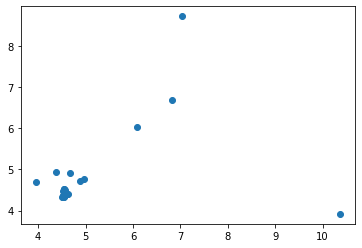

In [52]:
x = [x[0] for x in topic_data[250]["coords"]]
y = [x[1] for x in topic_data[250]["coords"]]
fig, ax = plt.subplots()
ax.scatter(x, y)
# plt.plot(topic_data[250]["coords"])

(4.32752185, 4.4255822)


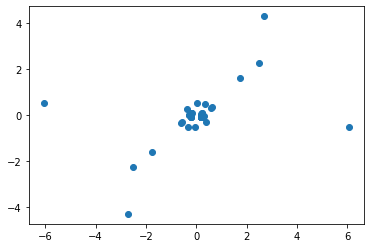

In [53]:
print(topic_data[250]["center"])
x = [x[0] for x in topic_data[250]["coords_recalc"]]
y = [x[1] for x in topic_data[250]["coords_recalc"]]
fig, ax = plt.subplots()
ax.scatter(x, y)

In [59]:
new_data = []
for key, value in topic_data.items():
    new_data.append(value)

In [60]:
new_df = pd.DataFrame(new_data)
new_df

,center,coords,coords_recalc
0,"(8.1200523, 8.177856)","[(11.140438, 5.0996666), (11.482964, 4.872748)...","[(-3.0203857000000003, 3.0781894000000003), (-..."
1,"(2.54598175, 2.54796835)","[(-1.4441612, 6.5361247), (-1.4483457, 6.54428...","[(3.99014295, -3.98815635), (3.99432745, -3.99..."
2,"(7.7300759999999995, 6.889846749999999)","[(11.950356, 3.509796), (11.676706, 2.1029875)...","[(-4.22028, 3.380050749999999), (-3.94663, 4.7..."
3,"(8.123927, 8.2645248)","[(12.9099, 3.337954), (12.9297905, 3.5992591),...","[(-4.785973, 4.9265708), (-4.805863499999999, ..."
4,"(6.800119349999999, 6.68874665)","[(9.453081, 4.1471577), (9.542195, 3.8352983),...","[(-2.65296165, 2.5415889499999995), (-2.742075..."
...,...,...,...
262,"(6.21889435, 6.2107586999999995)","[(6.8734007, 5.564388), (7.0102787, 5.4112387)...","[(-0.6545063500000001, 0.6463706999999994), (-..."
263,"(5.9057107, 5.90736605)","[(5.350533, 6.4608884), (5.3683543, 6.4463778)...","[(0.5551776999999998, -0.5535223499999997), (0..."
264,"(6.848599500000001, 8.65320175)","[(11.704178, 1.993021), (13.501036, 3.8053675)...","[(-4.8555785, 6.660180749999999), (-6.65243649..."
265,"(5.1496388, 5.13675875)","[(8.71982, 1.5794576), (8.701916, 1.5716015), ...","[(-3.5701812000000004, 3.5573011500000002), (-..."


In [62]:
new_df.to_feather("../trc_topic_coords")

In [63]:
test = pd.read_feather("../trc_topic_coords")
test

,center,coords,coords_recalc
0,"[8.1200523, 8.177856]","[[11.140438, 5.0996666], [11.482964, 4.872748]...","[[-3.0203857000000003, 3.0781894000000003], [-..."
1,"[2.54598175, 2.54796835]","[[-1.4441612, 6.5361247], [-1.4483457, 6.54428...","[[3.99014295, -3.98815635], [3.99432745, -3.99..."
2,"[7.7300759999999995, 6.889846749999999]","[[11.950356, 3.509796], [11.676706, 2.1029875]...","[[-4.22028, 3.380050749999999], [-3.94663, 4.7..."
3,"[8.123927, 8.2645248]","[[12.9099, 3.337954], [12.9297905, 3.5992591],...","[[-4.785973, 4.9265708], [-4.805863499999999, ..."
4,"[6.800119349999999, 6.68874665]","[[9.453081, 4.1471577], [9.542195, 3.8352983],...","[[-2.65296165, 2.5415889499999995], [-2.742075..."
...,...,...,...
262,"[6.21889435, 6.2107586999999995]","[[6.8734007, 5.564388], [7.0102787, 5.4112387]...","[[-0.6545063500000001, 0.6463706999999994], [-..."
263,"[5.9057107, 5.90736605]","[[5.350533, 6.4608884], [5.3683543, 6.4463778]...","[[0.5551776999999998, -0.5535223499999997], [0..."
264,"[6.848599500000001, 8.65320175]","[[11.704178, 1.993021], [13.501036, 3.8053675]...","[[-4.8555785, 6.660180749999999], [-6.65243649..."
265,"[5.1496388, 5.13675875]","[[8.71982, 1.5794576], [8.701916, 1.5716015], ...","[[-3.5701812000000004, 3.5573011500000002], [-..."
